In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files

uploaded = files.upload()

Saving Telco-Customer-Churn.xlsx to Telco-Customer-Churn.xlsx


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Load Excel file
df = pd.read_excel("Telco-Customer-Churn.xlsx")

# View first rows
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [11]:
# Check duplicates
print("Duplicates:", df.duplicated().sum())

# Remove them
df = df.drop_duplicates()


Duplicates: 0


In [12]:
# Check missing values
print(df.isnull().sum())

# Example: Fill numeric with median, categorical with mode
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


/tmp/ipython-input-1726707975.py:9: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  df[col] = df[col].fillna(df[col].mode()[0])


In [14]:
# Using IQR
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))


In [16]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df.select_dtypes(include=np.number).columns] = scaler.fit_transform(
    df.select_dtypes(include=np.number)
)

# OR MinMax
# scaler = MinMaxScaler()
# df_scaled[df.select_dtypes(include=np.number).columns] = scaler.fit_transform(df.select_dtypes(include=np.number))


In [17]:
df_encoded = pd.get_dummies(df_scaled, drop_first=True)


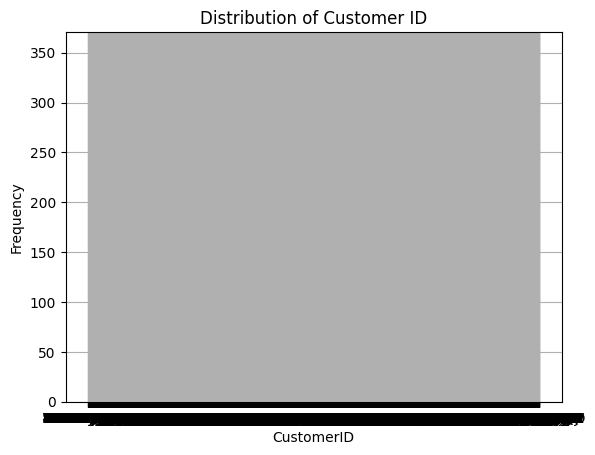

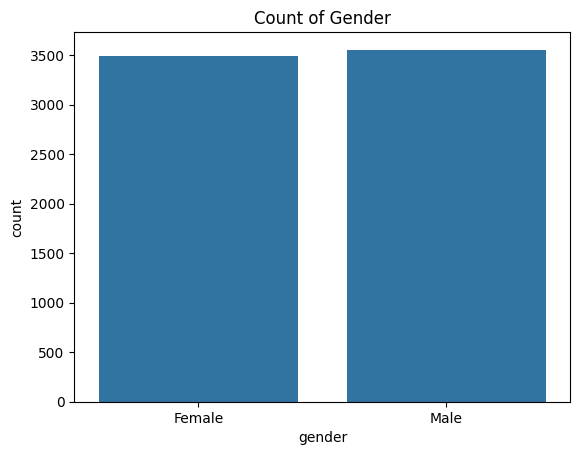

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for customer id (numeric/identifier)
df['customerID'].hist(bins=20)
plt.title("Distribution of Customer ID")
plt.xlabel("CustomerID")
plt.ylabel("Frequency")
plt.show()

# Countplot for gender (categorical)
sns.countplot(x='gender', data=df)
plt.title("Count of Gender")
plt.show()


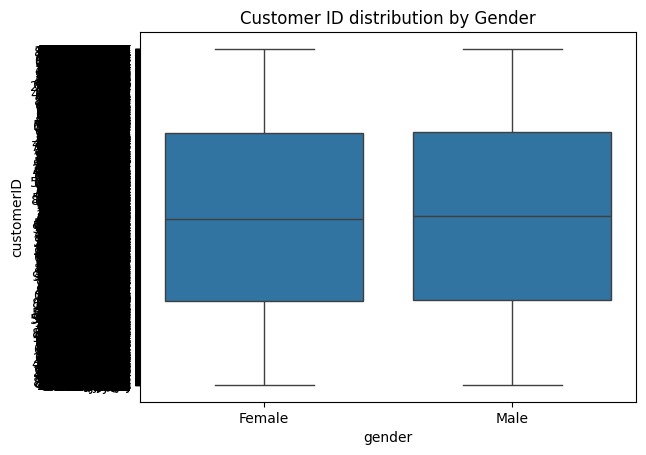

In [28]:
sns.boxplot(x='gender', y='customerID', data=df)
plt.title("Customer ID distribution by Gender")
plt.show()


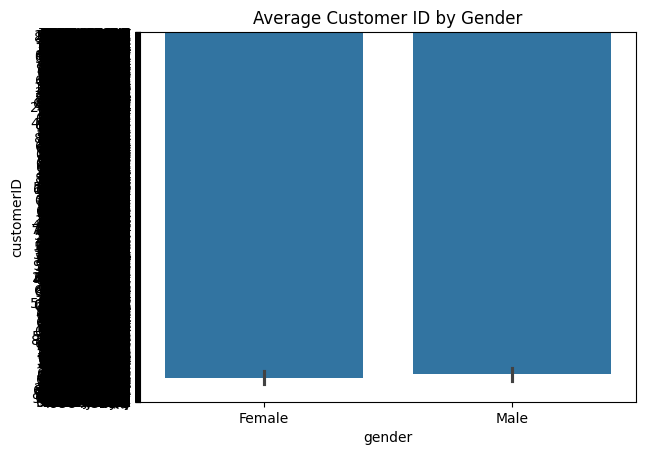

In [29]:
sns.barplot(x='gender', y='customerID', data=df, estimator=np.mean)
plt.title("Average Customer ID by Gender")
plt.show()
